In [30]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from definitions import *
import cv2
from triangles import TRIANGLES

In [2]:
masks_df = []
expressions = os.listdir(PROCESSED_PATH)
for exp in expressions:
    if(len(exp.split("."))>1):
        continue
    types = os.listdir(PROCESSED_PATH + "/" + exp)
    for tp in types:
        if(len(tp.split("."))>1):
            continue
        df = pd.read_csv(PROCESSED_PATH + "/" + exp+"/"+tp+"/mean-lms-"+exp+"-"+tp+".csv",index_col=0)
        masks_df.append([exp+"-"+tp,df])

In [3]:
dists_df = pd.read_csv("./masks_average_dists.csv",index_col=0)

# Heatmap nos pontos

In [11]:
for exp_tp, mask_df in tqdm(masks_df):
    if(exp_tp == "00-00"):
        continue
    exp,tp = exp_tp.split("-")
    image = np.zeros(
            (int(final_image_size_height), int(final_image_size_width), 3), dtype='uint8')
    x = (mask_df["x"]).tolist()
    y = (mask_df["y"]).tolist()
    lms = []
    for i in range(len(x)):
        lms.append([int(x[i]), int(y[i])])
    max_esc = dists_df[exp_tp].max() - dists_df[exp_tp].min()
    for i,lm in enumerate(lms):
        
        # vermelho
        #   min   -   0
        #   max   -   255
        #   val   -   x
        #       x = val*255/max
        # azul
        #   min   -   255
        #   max   -   0
        #   val   -   x
        #       x = 255 - val*255/max
        red = float(dists_df[exp_tp].tolist()[i])*255/float(max_esc)
        blue = 255 - red
        image = cv2.circle(image, (lm), radius=5, color=(int(blue),0, int(red)), thickness=-1)




    #im_color = cv2.LUT(gray, np.array(lut))


    cv2.imwrite("./heatmap_dists_by_points/"+exp_tp+".png", im_color)

100%|██████████| 16/16 [00:01<00:00, 11.03it/s]


In [19]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
I.shape

(1000, 1000)

# Heatmap nos triangulos

In [76]:
for exp_tp, mask_df in tqdm(masks_df):
    if(exp_tp == "00-00"):
        continue
    exp,tp = exp_tp.split("-")
    image = np.zeros(
            (int(final_image_size_height), int(final_image_size_width), 3), dtype=float)
    x = (mask_df["x"]).tolist()
    y = (mask_df["y"]).tolist()
    lms = []
    for i in range(len(x)):
        lms.append([int(x[i]), int(y[i])])
    for tria in TRIANGLES:
        mean_blue = 0
        mean_red = 0
        pts = []
        for pt in tria:
            pts.append(lms[pt])
            max_esc = dists_df[exp_tp].max() - dists_df[exp_tp].min()
            red = float(dists_df[exp_tp].tolist()[pt])*255/float(max_esc)
            blue = 255 - red
            mean_blue+=blue/3
            mean_red+=red/3
        

        triangle_cnt = np.array( pts)
        cv2.drawContours(image, [triangle_cnt], 0, (int(mean_blue),0,int(mean_red)), -1)
    
    
    cv2.imwrite("./heatmap_dists_by_triangles/"+exp_tp+".png", image)

100%|██████████| 16/16 [00:07<00:00,  2.18it/s]


In [ ]:
colormap = viridis

100%|██████████| 16/16 [00:40<00:00,  2.56s/it]


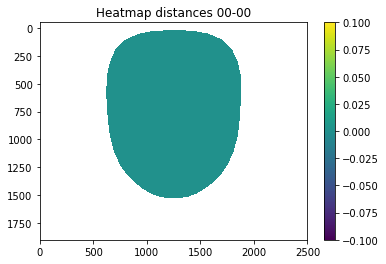

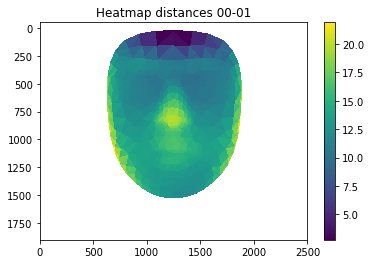

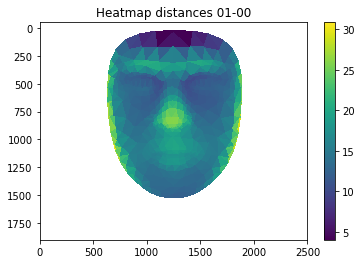

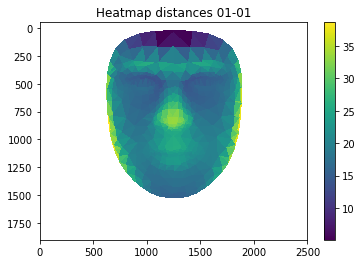

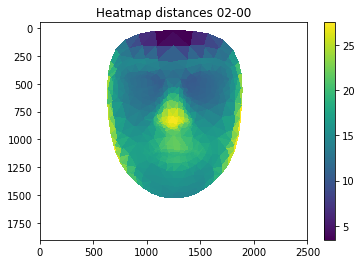

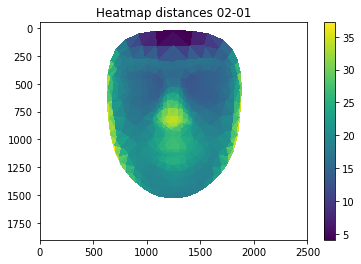

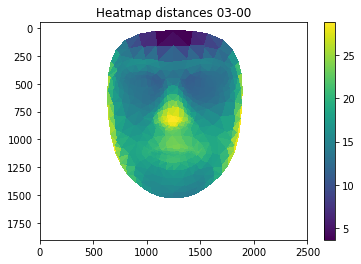

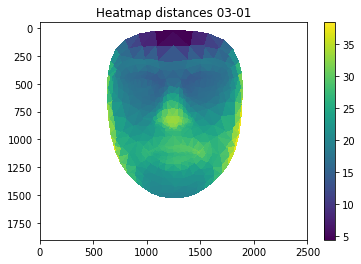

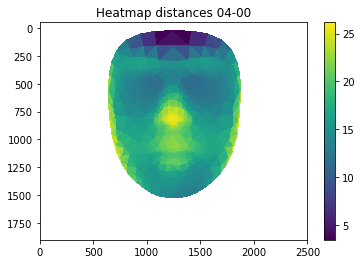

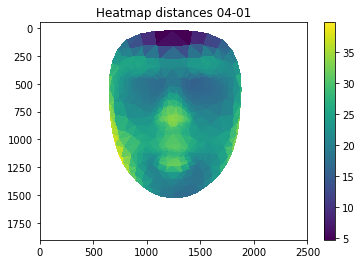

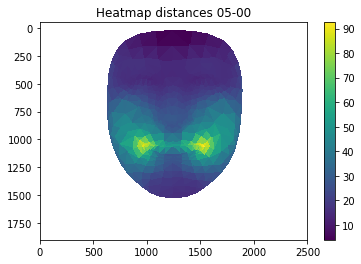

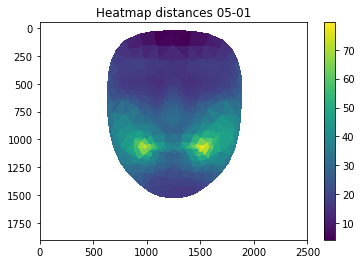

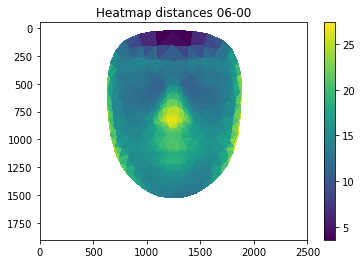

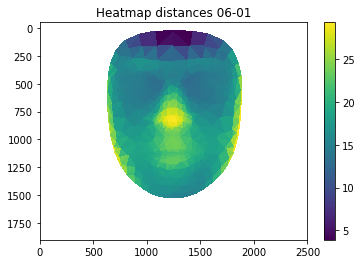

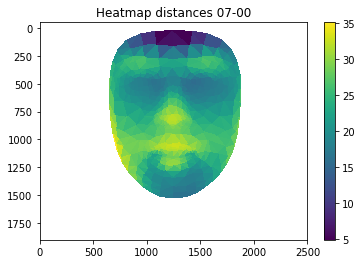

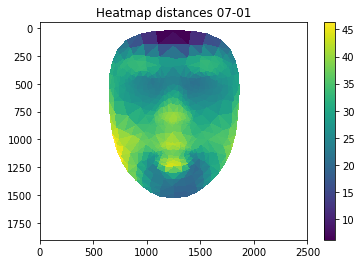

In [37]:
for exp_tp, mask_df in tqdm(masks_df):
    exp,tp = exp_tp.split("-")
    fig, ax = plt.subplots()

    x = np.linspace(0, 1, int(final_image_size_width))

    y = np.linspace(0, 1, int(final_image_size_height))

    tc = ax.tripcolor(mask_df.x, mask_df.y,dists_df[exp_tp],cmap=colormap)

    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_title("Heatmap distances "+ exp_tp)
    ax.set(xlim=(0, final_image_size_width),ylim=final_image_size_height)
    fig.colorbar(tc, ax=ax)
    fig.savefig("./heatmap_dists_by_triangles_seaborn/"+exp_tp+".jpg",dpi = 2000)
    plt.ioff()

In [38]:
for exp_tp, mask_df in tqdm(masks_df):
    exp,tp = exp_tp.split("-")
    fig, ax = plt.subplots()

    x = np.linspace(0, 1, int(final_image_size_width))

    y = np.linspace(0, 1, int(final_image_size_height))

    tc = ax.tripcolor(mask_df.x, mask_df.y,dists_df[exp_tp],cmap=colormap,vmin=dists_df.to_numpy().min(), vmax=dists_df.to_numpy().max())

    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_title("Heatmap (fixed) distances "+ exp_tp)
    
    ax.set(xlim=(0, final_image_size_width),ylim=final_image_size_height)
    fig.colorbar(tc, ax=ax)
    fig.savefig("./heatmap_dists_by_triangles_seaborn_fixed_colorbar-limits/"+exp_tp+".jpg",dpi = 2000)
    plt.ioff()

 31%|███▏      | 5/16 [00:13<00:28,  2.62s/it]

In [32]:
print(dists_df.to_numpy().min(), dists_df.to_numpy().max())

0.0 94.38511326860844


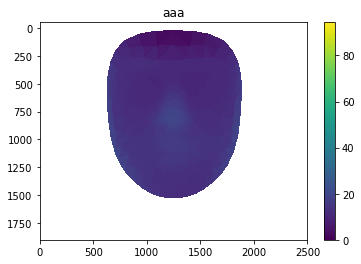

In [36]:

fig, ax = plt.subplots()

x = np.linspace(0, 1, int(final_image_size_width))

y = np.linspace(0, 1, int(final_image_size_height))

tc = ax.tripcolor(masks_df[1][1].x, masks_df[1][1].y,dists_df["00-01"],cmap="viridis",vmin=dists_df.to_numpy().min(), vmax=dists_df.to_numpy().max())

ax.set_ylim(ax.get_ylim()[::-1])
ax.set_title("aaa")


fig.colorbar(tc, ax=ax)
ax.set(xlim=(0, final_image_size_width),ylim=final_image_size_height)
fig.savefig("aa.jpg",dpi = 1000)